# 台灣銀行牌告匯率爬蟲練習

### 作業part 1：爬取所有貨幣對台幣的匯率

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

for p in rate_table:
    currency = p.find('div', class_='visible-phone print_hide')

    buy_rate = p.find('td', {'data-table':'本行現金買入'})
    sell_rate = p.find('td', {'data-table':'本行現金賣出'})
    print(f"{currency.string.strip()}  即時現金買入: {buy_rate.string}, 即時現金賣出: {sell_rate.string}")

美金 (USD)  即時現金買入: 31.875, 即時現金賣出: 32.545
港幣 (HKD)  即時現金買入: 3.976, 即時現金賣出: 4.18
英鎊 (GBP)  即時現金買入: 40.09, 即時現金賣出: 42.21
澳幣 (AUD)  即時現金買入: 21.08, 即時現金賣出: 21.86
加拿大幣 (CAD)  即時現金買入: 23.09, 即時現金賣出: 24
新加坡幣 (SGD)  即時現金買入: 23.38, 即時現金賣出: 24.29
瑞士法郎 (CHF)  即時現金買入: 35.37, 即時現金賣出: 36.57
日圓 (JPY)  即時現金買入: 0.1974, 即時現金賣出: 0.2102
南非幣 (ZAR)  即時現金買入: -, 即時現金賣出: -
瑞典幣 (SEK)  即時現金買入: 2.72, 即時現金賣出: 3.24
紐元 (NZD)  即時現金買入: 19.5, 即時現金賣出: 20.35
泰幣 (THB)  即時現金買入: 0.7567, 即時現金賣出: 0.9467
菲國比索 (PHP)  即時現金買入: 0.4849, 即時現金賣出: 0.6169
印尼幣 (IDR)  即時現金買入: 0.00163, 即時現金賣出: 0.00233
歐元 (EUR)  即時現金買入: 34.3, 即時現金賣出: 35.64
韓元 (KRW)  即時現金買入: 0.02189, 即時現金賣出: 0.02579
越南盾 (VND)  即時現金買入: 0.00105, 即時現金賣出: 0.00146
馬來幣 (MYR)  即時現金買入: 5.832, 即時現金賣出: 7.352
人民幣 (CNY)  即時現金買入: 4.348, 即時現金賣出: 4.51


### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

美金 (USD)


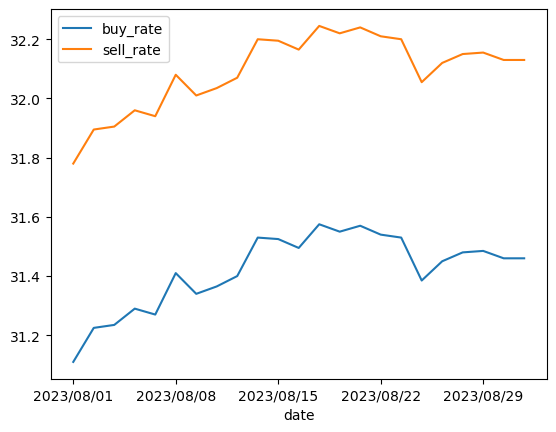

港幣 (HKD)


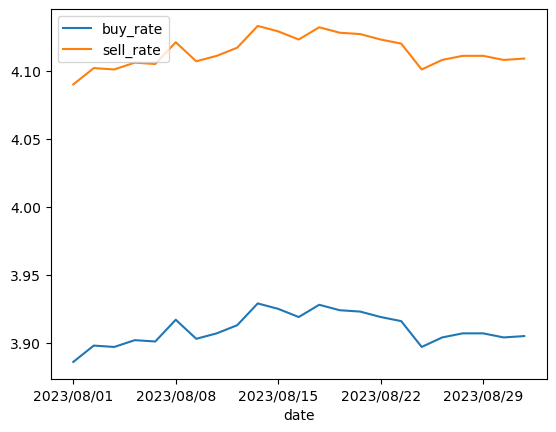

英鎊 (GBP)


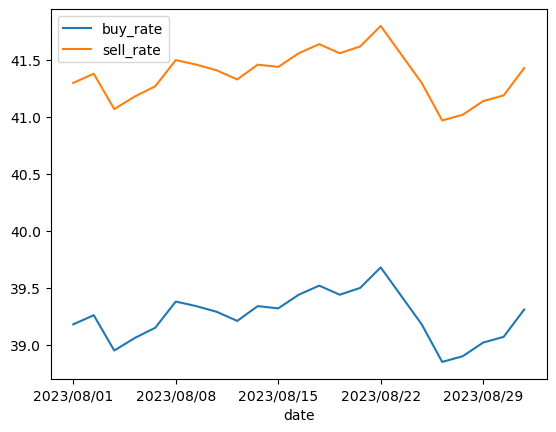

澳幣 (AUD)


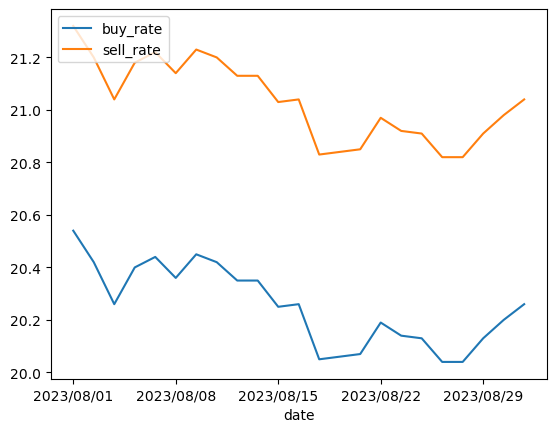

加拿大幣 (CAD)


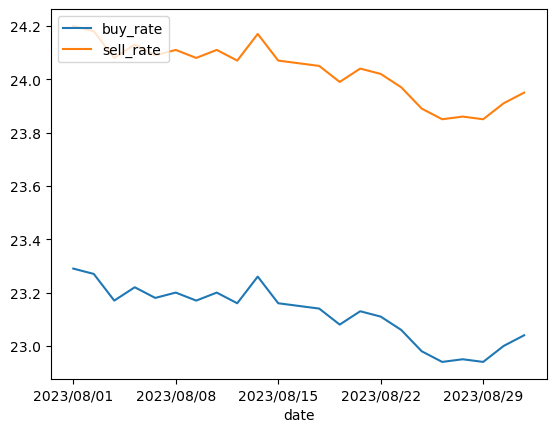

新加坡幣 (SGD)


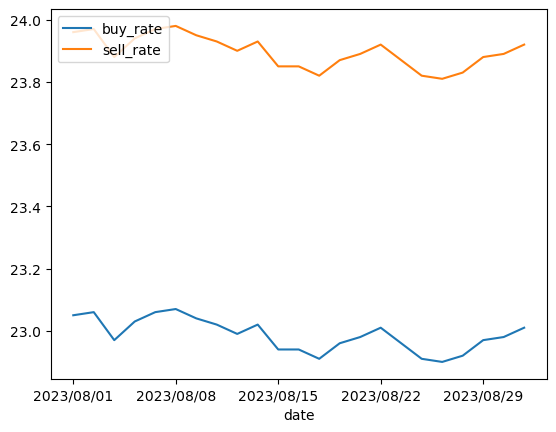

瑞士法郎 (CHF)


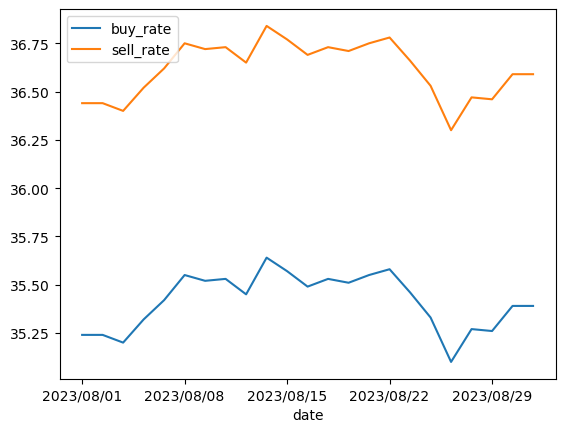

日圓 (JPY)


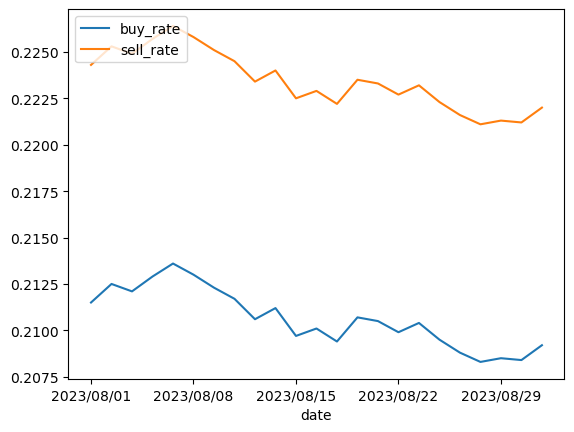

南非幣 (ZAR)


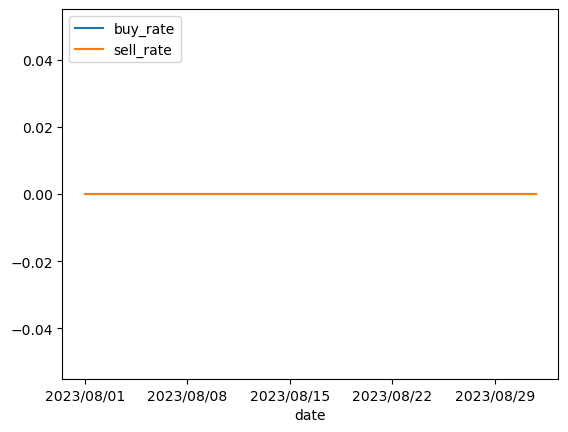

瑞典幣 (SEK)


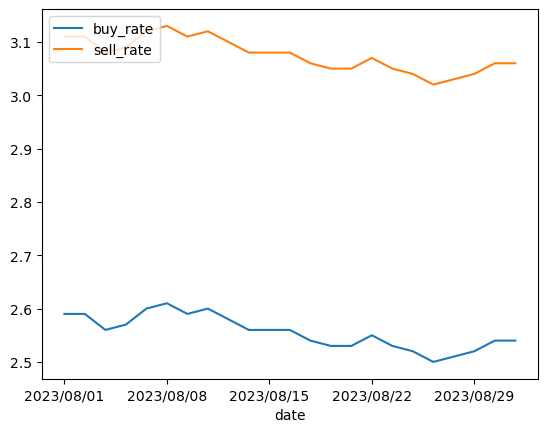

紐元 (NZD)


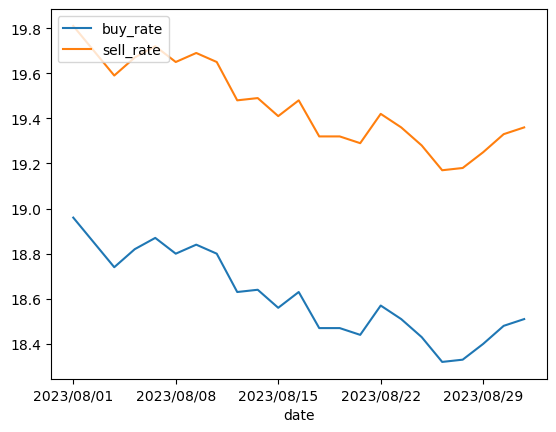

泰幣 (THB)


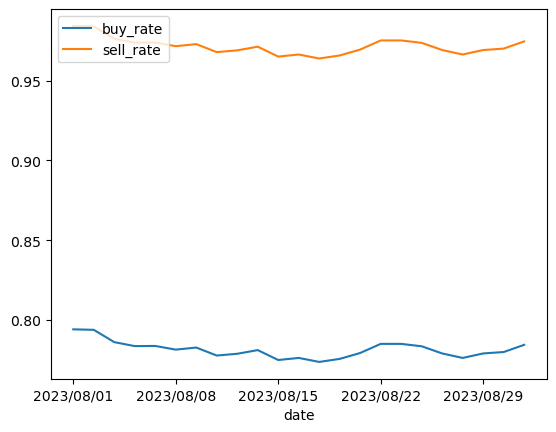

菲國比索 (PHP)


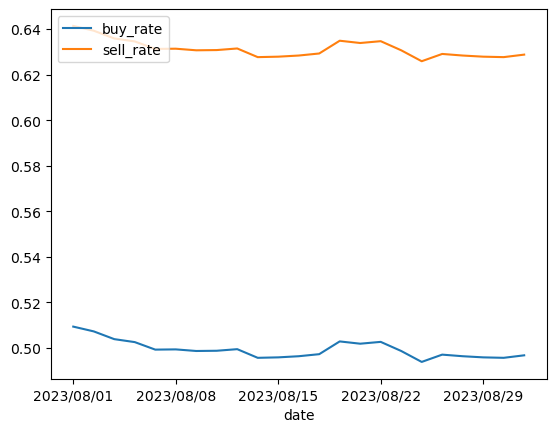

印尼幣 (IDR)


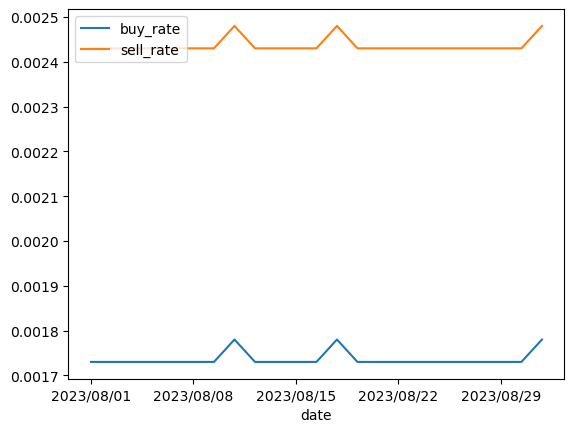

歐元 (EUR)


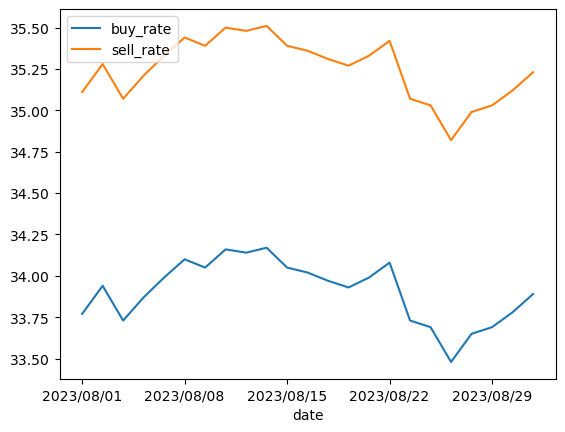

韓元 (KRW)


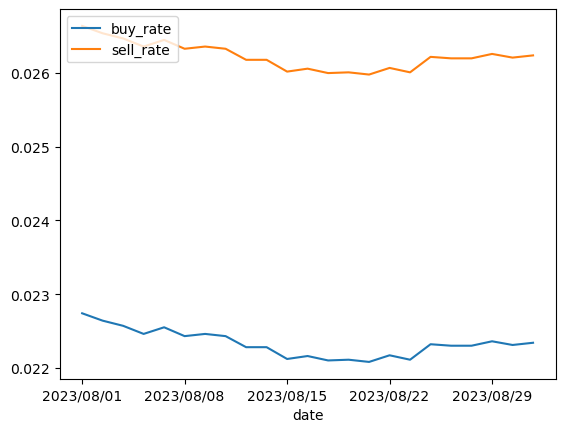

越南盾 (VND)


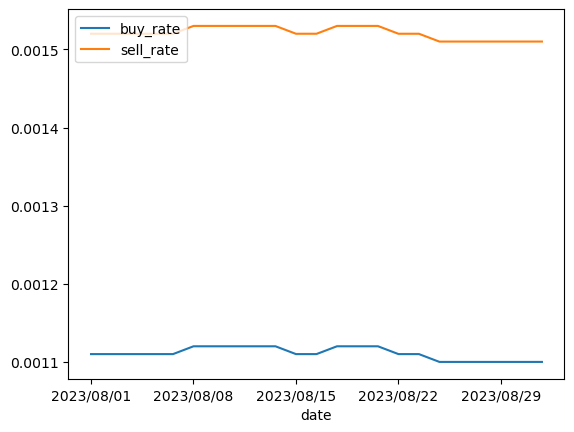

馬來幣 (MYR)


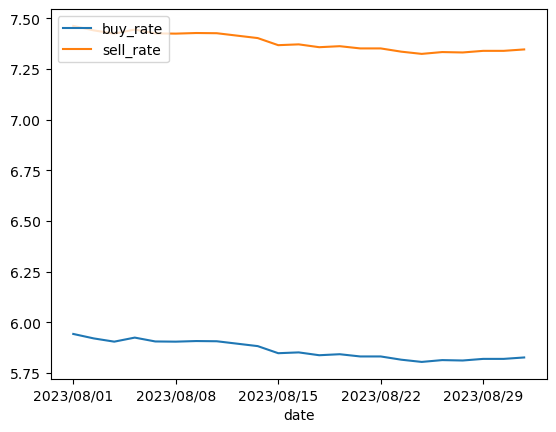

人民幣 (CNY)


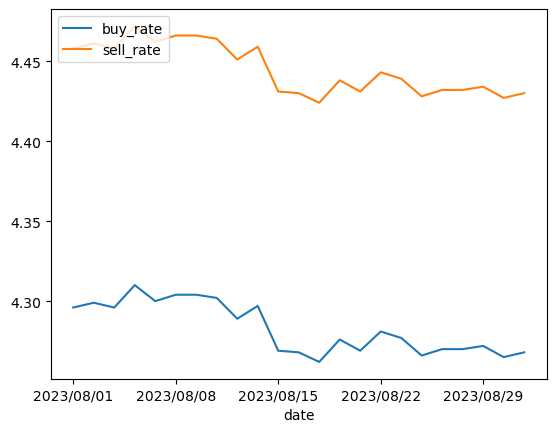

In [2]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
html = BeautifulSoup(resp.text, 'lxml')
rate_table = html.find('table', {'title':'牌告匯率'}).find('tbody').find_all('tr')

# 擷取匯率表格，把每種貨幣種類擷取出來，再針對貨幣種類，查詢其歷史匯率
for p in rate_table:
    currency = p.find('div', class_='visible-phone print_hide')
    print(currency.get_text().strip())  # 貨幣種類

    # 接下來針對每種貨幣，找到其「歷史匯率」的首頁 
    history_link = p.find('td', {'data-table':'歷史匯率'})
    history_rate_link = 'https://rate.bot.com.tw' + history_link.a['href']  # 該貨幣的歷史資料首頁

    #
    # 回到貨幣歷史匯率網頁，點選該貨幣的「歷史區間」，觀察其網址變化情形，再試著抓取其歷史匯率資料
    #
    # 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
    quote_history_url = history_rate_link.replace('history', 'quote/2023-08')
    resp = requests.get(quote_history_url)
    history = BeautifulSoup(resp.text, 'lxml')
    history_table = history.find('table', {'title':'歷史本行營業時間牌告匯率'}).find('tbody').find_all('tr')

    #
    # 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
    #
    date_history = list()
    history_buy = list()
    history_sell = list()

    for history_rate in history_table:
        # 擷取日期資料
        date_string = history_rate.a.get_text()
        date_history.append(date_string)  # 日期歷史資料

        history_ex_rate = history_rate.find_all('td', class_='rate-content-cash text-right print_table-cell')
        history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
        history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

    # 將匯率資料建成dataframe形式
    HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                        'buy_rate':history_buy,
                                        'sell_rate':history_sell})

    HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
    HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

    HistoryExchangeRate.plot()
    plt.legend(loc='upper left')
    plt.show()